# A Quick Look at Machine Learning

This notebook is a quick example of how machine learning algorithms from the [scikit-learn](http://scikit-learn.org) Python library can be used within a [Jupyter notebook](http://jupyter.org).

In [1]:
%matplotlib inline
# Load plotting library
import matplotlib.pyplot as plt

# Get datasets, learning algorithm (SVM), and evaluation methods from the scikit-learn library
from sklearn import datasets, svm, metrics

## Looking at the data

Let's load the `digits` dataset that comes with scikit-learn and have a look at some of the examples we want to generalise from. 

The object `digits` returns by the call to `load_digits()` is an structure with fields for describing the data set. As described in the [scikit-learn documentation for `load_digits()`][load-digits], the fields include:

* `DESCR`:   A description of the data set and its origins.
* `images`:  An 8x8 array of arrays containing grayscale pixel values for each digit.
* `data`:    The same information as in `images` but concatenated into a single array.
* `target`:  The correct labels for each of the handwritten digits.

[load-digits]: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Vector repsentation: [  0.   6.  13.   5.   8.   8.   1.   0.   0.   8.  16.  16.  16.  16.   6.
   0.   0.   6.  16.   9.   6.   4.   0.   0.   0.   6.  16.  16.  15.   5.
   0.   0.   0.   0.   4.   5.  15.  12.   0.   0.   0.   0.   0.   3.  16.
   9.   0.   0.   0.   1.   8.  13.  15.   3.   0.   0.   0.   4.  16.  15.
   3.   0.   0.   0.]
Target value: 5


1797

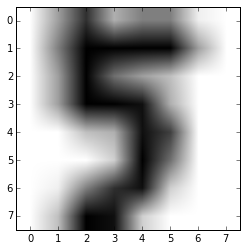

In [2]:
digits = datasets.load_digits()
# Show the a digit as an array and use the matplotlib `imshow` function to display 
# the 8x8 array of pixel values as an image
index = 33
print('Vector repsentation: {}'.format(digits.data[index]))
print('Target value: {}'.format(digits.target[index]))
plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
len(digits.data)

## Training a classifier

We now train a [support vector machine][svm] (SVM) classifier on the digits data by passing in the array representation of the digits alongside their target labels.

First, we will take the half of the data as a _training set_ and put all the digits in a matrix `X_train` with each row representing a digit.
Then we will make a target vector `y_train` with each of the target labels for the digits in `X_train`.

Similarly, we will take the second half of the data as a _test set_, which we will use later to check how accurate our learnt digit classifier is. 

[svm]: http://scikit-learn.org/stable/modules/svm.html

In [3]:
# Set the training size to half the total number of digits in the data set
N = int(len(digits.data) / 2)
X_train = digits.data[:N]
y_train = digits.target[:N]

X_test = digits.data[N:]
y_test = digits.target[N:]

Now we set up an instance of a SVM classifier learning algorithm and train it using the training set.

SVM algorithms take several arguments (bandwidth, kernel, tolerance) which are important to understand but we will leave most of these as their default values, except for `gamma` which (roughly speaking) controls what it means for two images to be "close" to each other. In practice this is usually set by trial-and-error.

Once an instance of the SVM classifier is contructed, it is trained using its `fit` method.

In [4]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

## Evaluating the classifier

Now that we have a trained classifier we can use it to make predictions on new images using its `predict` method.

Let's look at the first image in the test set, the prediction the classifier gives it, and the true target label.

It is important to note that the classifier has never "seen" the images in the test set as it was only passed in the training set to learn from.

Predicted: [9]; Actual: 5


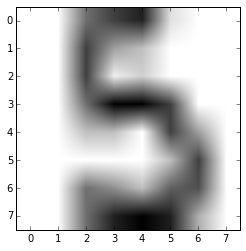

In [5]:
# The image for test point with index i is at (N + i)
# (Set test_index to 32 to see an incorrect prediction)
test_index = 32
plt.imshow(digits.images[N+test_index], cmap=plt.cm.gray_r)
predicted = classifier.predict(X_test[test_index])
actual    = y_test[test_index]
print('Predicted: {}; Actual: {}'.format(predicted, actual))

Finally, let's write a short loop to go through all of the test points to calculate what percentage of previously unseen images the classifier gets wrong.

In [6]:
errors = []
for test_index in range(N):
    predicted = classifier.predict(X_test[test_index])
    actual    = y_test[test_index]
    if predicted[0] != actual:
        errors.append(test_index)

print('Error rate: {:.2f}%'.format(100*len(errors)/N))

Error rate: 3.12%


The indices of the incorrectly classified digits are in `errors`. Let's have a look at them.

Predicted: 9; Actual: 5


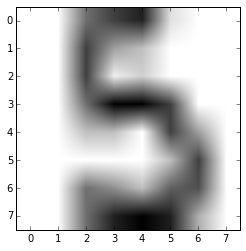

Predicted: 9; Actual: 5


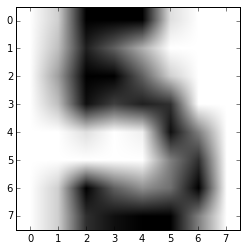

Predicted: 9; Actual: 4


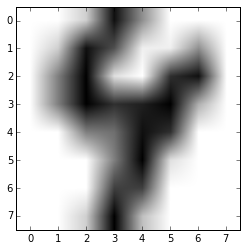

Predicted: 5; Actual: 7


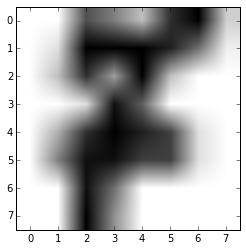

Predicted: 7; Actual: 3


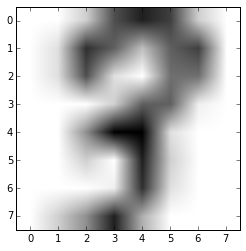

Predicted: 2; Actual: 1


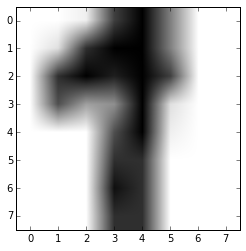

Predicted: 8; Actual: 1


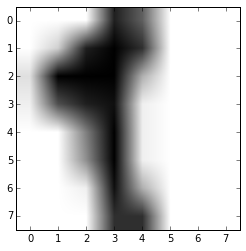

Predicted: 9; Actual: 1


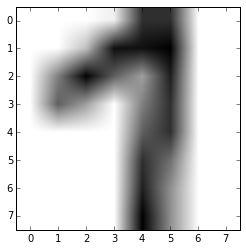

Predicted: 6; Actual: 5


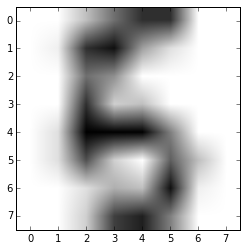

Predicted: 3; Actual: 2


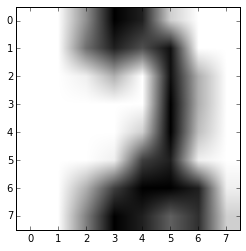

Predicted: 1; Actual: 6


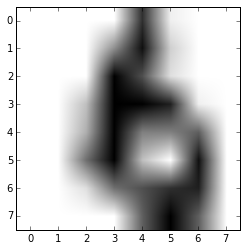

Predicted: 4; Actual: 0


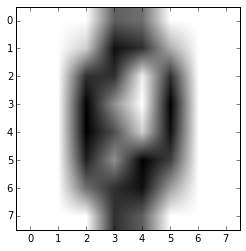

Predicted: 8; Actual: 3


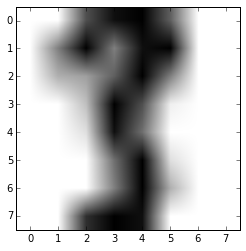

Predicted: 7; Actual: 3


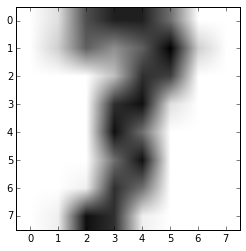

Predicted: 7; Actual: 3


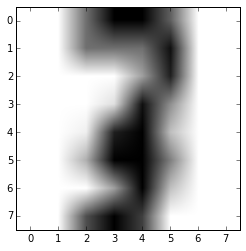

Predicted: 9; Actual: 4


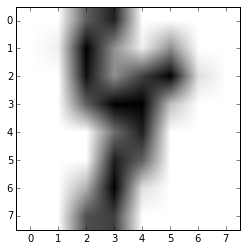

Predicted: 9; Actual: 4


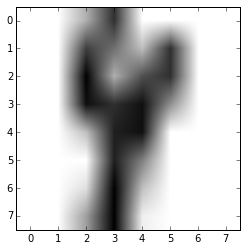

Predicted: 3; Actual: 9


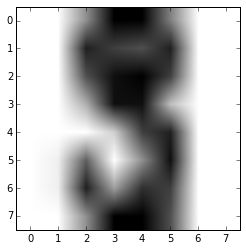

Predicted: 9; Actual: 4


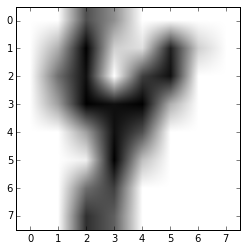

Predicted: 5; Actual: 9


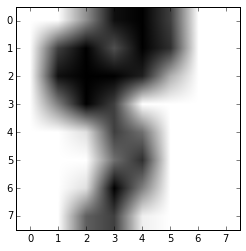

Predicted: 8; Actual: 3


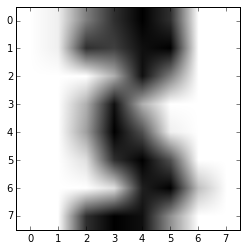

Predicted: 5; Actual: 3


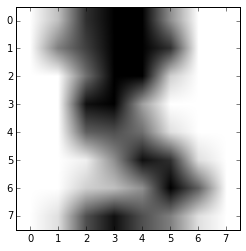

Predicted: 7; Actual: 3


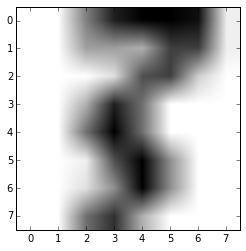

Predicted: 8; Actual: 3


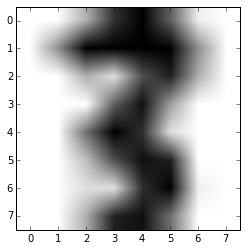

Predicted: 8; Actual: 3


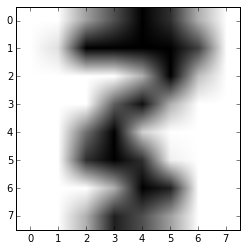

Predicted: 5; Actual: 3


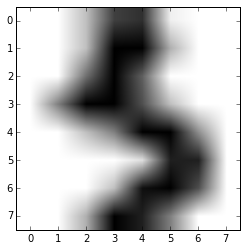

Predicted: 8; Actual: 3


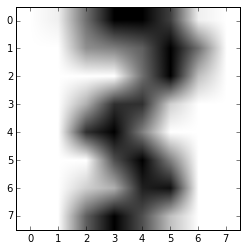

Predicted: 5; Actual: 3


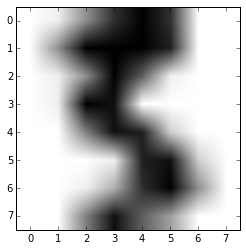

In [7]:
for err_index in errors:
    predicted = classifier.predict(X_test[err_index])
    actual    = y_test[err_index]
    print('Predicted: {}; Actual: {}'.format(predicted[0], actual))
    plt.imshow(digits.images[N+err_index], cmap=plt.cm.gray_r)
    plt.show()